In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

In [3]:
# Load the dataset
data = pd.read_csv('5kings_battles_v1.csv')

In [4]:
data.head(2)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1,0,15000,4000,Jaime Lannister,"Clement Piper, Vance",1,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1,0,NaN,120,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford,The Riverlands,NaN


In [5]:
data.tail(2)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,NaN,NaN,NaN,win,siege,0,1,1500,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,Frey,NaN,NaN,NaN,NaN,NaN,NaN,5000,8000,Stannis Baratheon,Roose Bolton,0,Winterfell,The North,NaN


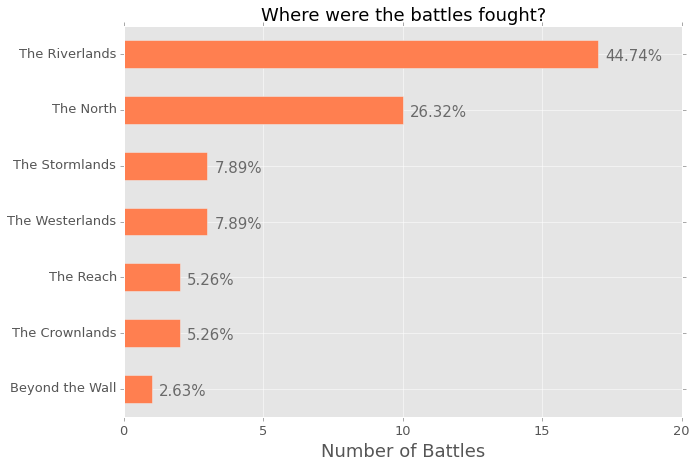

In [6]:
ax = data['region'].value_counts().plot(kind='barh', figsize=(10,7), 
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_xlabel("Number of Battles", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

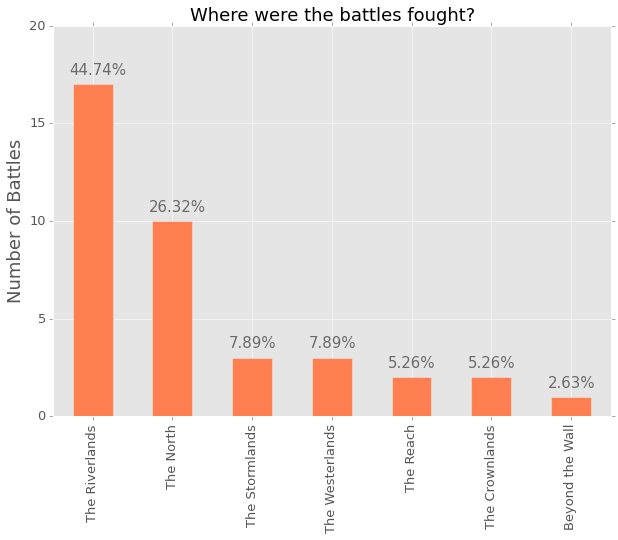

In [7]:
ax = data['region'].value_counts().plot(kind='bar', figsize=(10,7), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Where were the battles fought?", fontsize=18)
ax.set_ylabel("Number of Battles", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, 
            color='dimgrey')

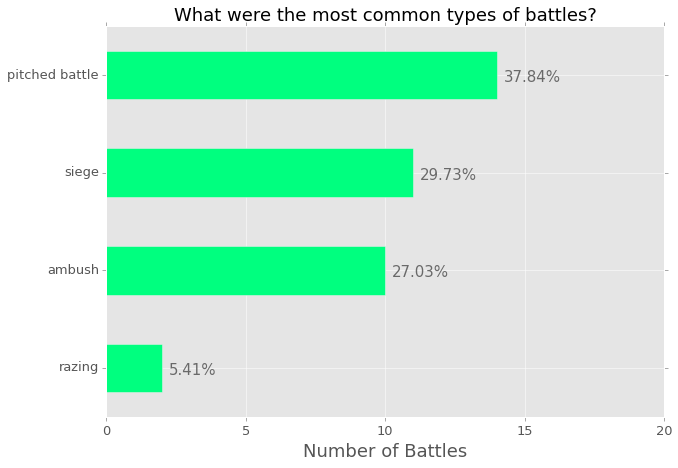

In [8]:
ax = data['battle_type'].value_counts().plot(kind='barh', figsize=(10,7), color="springgreen", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What were the most common types of battles?", fontsize=18)
ax.set_xlabel("Number of Battles", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.32, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

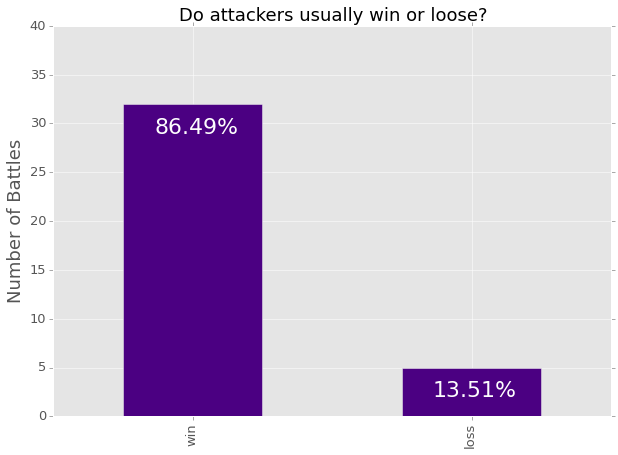

In [9]:
ax = data['attacker_outcome'].value_counts().plot(kind='bar', figsize=(10,7), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Do attackers usually win or loose?", fontsize=18)
ax.set_ylabel("Number of Battles", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22, color='white')

In [10]:
losses = data[data['attacker_outcome'].str.contains("loss", na=False)]
losses.head(2)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1,1,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1,Green Fork,The Riverlands,NaN
16,Battle of the Fords,299,17,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,loss,pitched battle,0,0,20000,10000,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",1,Red Fork,The Riverlands,NaN


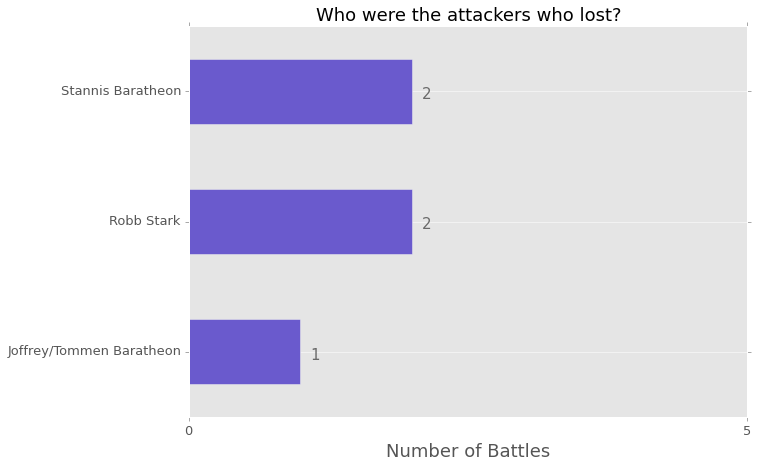

In [11]:
ax = losses['attacker_king'].value_counts().plot(kind='barh', figsize=(10,7), color="slateblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Who were the attackers who lost?", fontsize=18)
ax.set_xlabel("Number of Battles", fontsize=18);
ax.set_xticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

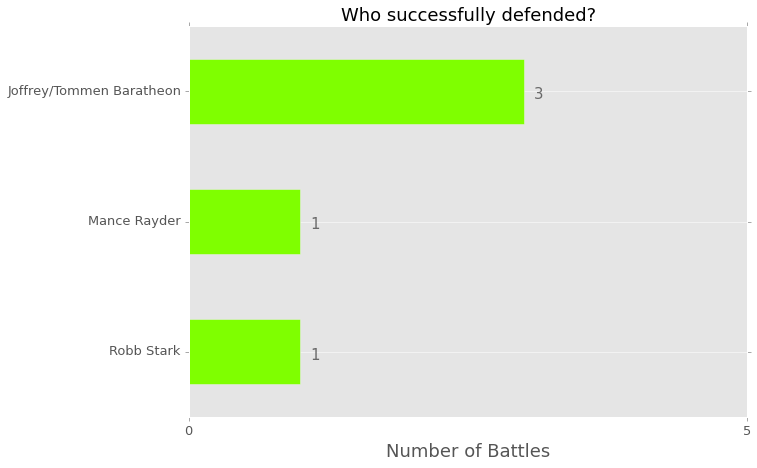

In [12]:
ax = losses['defender_king'].value_counts().plot(kind='barh', figsize=(10,7), color="chartreuse", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Who successfully defended?", fontsize=18)
ax.set_xlabel("Number of Battles", fontsize=18);
ax.set_xticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

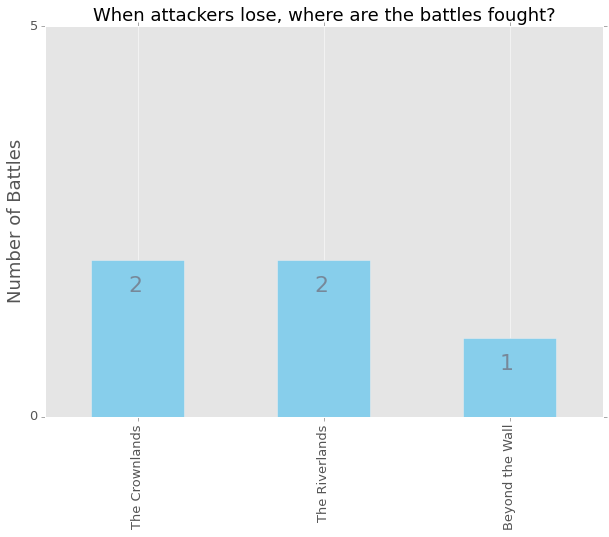

In [13]:
ax = losses['region'].value_counts().plot(kind='bar', figsize=(10,7), color="skyblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("When attackers lose, where are the battles fought?", fontsize=18)
ax.set_ylabel("Number of Battles", fontsize=18);
ax.set_yticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.21, i.get_height()-.4, \
            str(round((i.get_height()), 2)), fontsize=22, color='lightslategrey')

In [14]:
losses[['attacker_king', 'attacker_size', 'defender_king', 'defender_size']]

,attacker_king,attacker_size,defender_king,defender_size
3,Robb Stark,18000,Joffrey/Tommen Baratheon,20000
16,Joffrey/Tommen Baratheon,20000,Robb Stark,10000
19,Stannis Baratheon,21000,Joffrey/Tommen Baratheon,7250
21,Robb Stark,3000,Joffrey/Tommen Baratheon,NaN
27,Stannis Baratheon,100000,Mance Rayder,1240


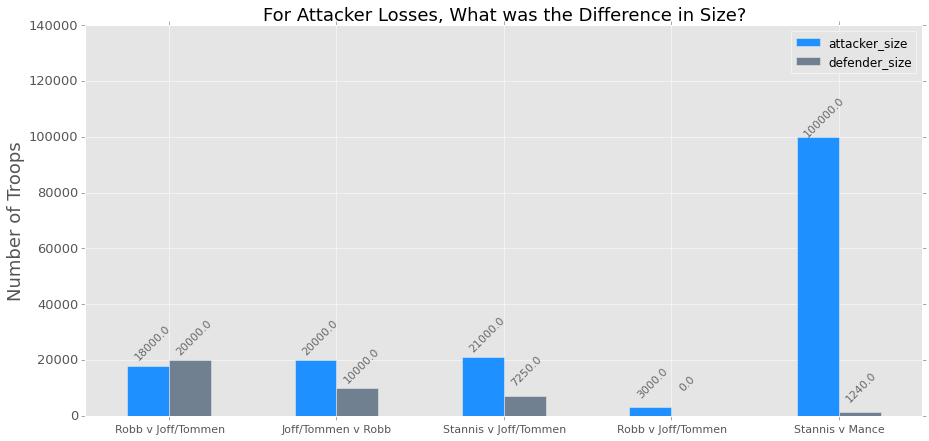

In [15]:
ax = losses[['attacker_size', 'defender_size']].plot(kind='bar', figsize=(15,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("For Attacker Losses, What was the Difference in Size?", fontsize=18)
ax.set_ylabel("Number of Troops", fontsize=18);
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000])
ax.set_xticklabels(["Robb v Joff/Tommen", "Joff/Tommen v Robb", "Stannis v Joff/Tommen", "Robb v Joff/Tommen", "Stannis v Mance"], \
                   rotation=0, fontsize=11)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+12000, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey', rotation=45)

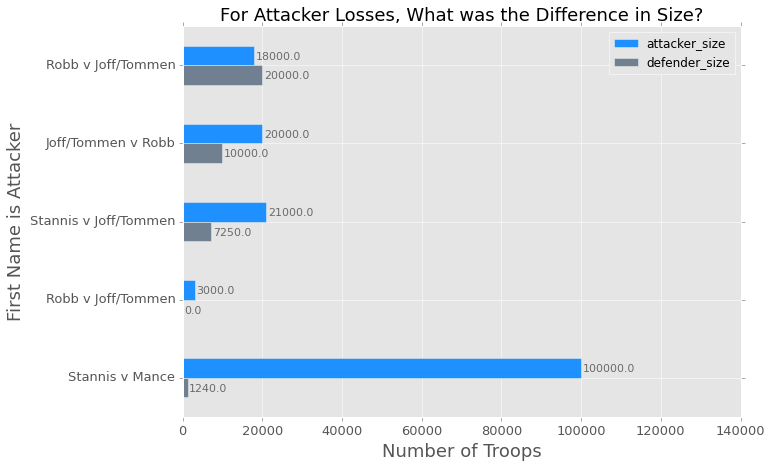

In [16]:
ax = losses[['attacker_size', 'defender_size']].plot(kind='barh', figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("For Attacker Losses, What was the Difference in Size?", fontsize=18)
ax.set_xlabel("Number of Troops", fontsize=18)
ax.set_ylabel("First Name is Attacker", fontsize=18)
ax.set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000])
ax.set_yticklabels(["Robb v Joff/Tommen", "Joff/Tommen v Robb", "Stannis v Joff/Tommen", "Robb v Joff/Tommen", "Stannis v Mance"])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+700, i.get_y()+.18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [17]:
# create a period range for the game of thrones dates; freq=Y gives just the year
year = pd.period_range('298', '300', periods=3, freq='Y')
year

PeriodIndex(['298', '299', '300'], dtype='int64', freq='A-DEC')

In [18]:
# create a dict to map the values to replace in the dataframe
year_map = {298: year[0], 299: year[1], 300: year[2]}
data = data.replace({'year': year_map})
data['year']

0     298
1     298
2     298
3     298
4     298
5     298
6     298
7     299
8     299
9     299
10    299
11    299
12    299
13    299
14    299
15    299
16    299
17    299
18    299
19    299
20    299
21    299
22    299
23    299
24    299
25    299
26    299
27    300
28    300
29    300
30    300
31    300
32    300
33    300
34    300
35    300
36    300
37    300
Name: year, dtype: object